In [2]:
import pymc as pm
import pandas as pd
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import plotnine as pn
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update({'font.size': 10})
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)


## **Capturing Decision Confidence Through Response Trajectories and Willingness to Gamble**
### This experiment was conducted to 1) show whether characteristic hand movemnts could proxy as an objective measurement of decision confidence and 2) study the relationship between certainty and confidence.


In [3]:
X = pd.read_csv("final_project_ra.csv")
X


,00.0320,00.0321,00.0640,00.0641,00.1280,...,10.0641,10.1280,10.1281,10.2560,10.2561
0,1,0,1,1,1,...,1,1,0,1,1
1,1,0,0,1,0,...,1,1,1,1,1
2,0,0,1,0,1,...,0,1,1,1,1
3,0,1,0,0,1,...,0,1,1,1,0
4,0,1,1,0,0,...,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
22,1,1,0,0,1,...,1,1,0,1,1
23,0,0,0,1,1,...,0,1,1,1,1
24,1,1,1,0,1,...,1,1,0,1,0
25,1,1,0,1,1,...,1,1,1,1,1


In [4]:
RT = pd.read_csv("final_project_rt.csv")
RT

,00.0320,00.0321,00.0640,00.0641,00.1280,...,10.0641,10.1280,10.1281,10.2560,10.2561
0,4.170772,4.962527,2.647969,2.669721,1.641654,...,2.177495,2.535070,4.287059,2.296884,5.216398
1,4.421846,3.829552,2.513819,1.814476,2.620922,...,1.145836,2.644222,1.361222,3.222021,6.187512
2,0.861996,1.159228,2.466041,1.526353,1.802206,...,2.773259,1.112888,1.803943,1.731408,2.889185
3,0.967065,1.484217,2.835726,4.213063,1.146552,...,1.482549,1.284056,1.471857,1.290877,1.110092
4,5.397618,2.932957,6.886387,4.147883,3.385578,...,4.828208,5.975727,3.429209,2.416588,4.615886
...,...,...,...,...,...,...,...,...,...,...,...
22,2.788482,3.487783,5.337054,1.972950,2.973171,...,1.752909,9.593934,3.506077,2.024775,2.050305
23,2.362252,3.519212,2.271807,1.906606,1.461629,...,3.311636,4.395563,3.883667,2.690419,2.231356
24,5.783235,2.107585,3.425153,6.183426,1.690001,...,5.084983,1.763408,10.838684,2.435449,2.503946
25,2.762112,2.920287,4.346121,3.680629,1.975501,...,2.690893,3.100608,3.872693,2.519982,2.357128


In [5]:
X.dropna()
X.shape

(27, 16)

In [6]:
RT.dropna()
I,J = RT.shape

## **Summary Statistics**

### **Item Performance**
### Response Accuarcy

In [7]:
X.astype('category').describe()

,00.0320,00.0321,00.0640,00.0641,00.1280,...,10.0641,10.1280,10.1281,10.2560,10.2561
count,27,27,27,27,27,...,27,27,27,27,27
unique,2,2,2,2,2,...,2,2,2,2,2
top,0,0,0,1,1,...,1,1,1,1,1
freq,16,15,14,14,20,...,17,21,19,26,23


In [8]:
X_t = X.astype('category').describe().T
X_t

,count,unique,top,freq
00.0320,27,2,0,16
00.0321,27,2,0,15
00.0640,27,2,0,14
00.0641,27,2,1,14
00.1280,27,2,1,20
...,...,...,...,...
10.0641,27,2,1,17
10.1280,27,2,1,21
10.1281,27,2,1,19
10.2560,27,2,1,26


In [9]:
X_t = X_t.pivot(columns="top", values="freq")
X_t

top,0,1
00.0320,16.0,NaN
00.0321,15.0,NaN
00.0640,14.0,NaN
00.0641,NaN,14.0
00.1280,NaN,20.0
...,...,...
10.0641,NaN,17.0
10.1280,NaN,21.0
10.1281,NaN,19.0
10.2560,NaN,26.0


In [10]:
X_t.columns.set_names("Top Response (Correct/Incorrect)",inplace=True)


<Axes: title={'center': 'Item Response Accuarcy'}, xlabel='Item', ylabel='Count'>

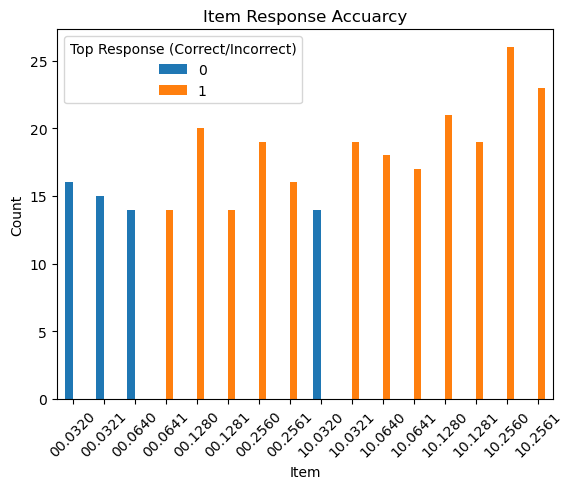

In [11]:
X_t.plot(xlabel="Item",ylabel="Count",title="Item Response Accuarcy",kind="bar",rot=45)

### Response Time

In [12]:
RT.describe()

,00.0320,00.0321,00.0640,00.0641,00.1280,...,10.0641,10.1280,10.1281,10.2560,10.2561
count,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000
mean,3.123781,2.790935,3.241678,3.659456,2.392613,...,3.142108,2.449435,3.521209,2.379240,2.972019
std,1.848480,1.457811,2.029637,2.476561,1.514582,...,1.758948,1.837018,2.611288,1.249962,1.589777
min,0.861996,0.863610,0.759392,0.891081,0.825459,...,0.864010,0.751435,0.691345,0.718933,0.802708
25%,1.548897,1.690099,1.729103,1.965196,1.376503,...,1.872695,1.347215,1.568391,1.498653,1.846917
50%,2.788482,2.363696,2.651866,3.186389,1.945654,...,2.690893,2.194009,3.212106,2.296884,2.566989
75%,4.608262,3.785856,4.148378,4.172546,2.975006,...,3.916296,2.636847,4.085363,3.158198,4.176496
max,7.747492,6.026435,7.176610,12.273716,7.823483,...,7.611050,9.593934,10.838684,6.585392,6.313436


In [13]:
RT_t = RT.describe().T
RT_t

,count,mean,std,min,25%,50%,75%,max
00.0320,27.0,3.123781,1.848480,0.861996,1.548897,2.788482,4.608262,7.747492
00.0321,27.0,2.790935,1.457811,0.863610,1.690099,2.363696,3.785856,6.026435
00.0640,27.0,3.241678,2.029637,0.759392,1.729103,2.651866,4.148378,7.176610
00.0641,27.0,3.659456,2.476561,0.891081,1.965196,3.186389,4.172546,12.273716
00.1280,27.0,2.392613,1.514582,0.825459,1.376503,1.945654,2.975006,7.823483
...,...,...,...,...,...,...,...,...
10.0641,27.0,3.142108,1.758948,0.864010,1.872695,2.690893,3.916296,7.611050
10.1280,27.0,2.449435,1.837018,0.751435,1.347215,2.194009,2.636847,9.593934
10.1281,27.0,3.521209,2.611288,0.691345,1.568391,3.212106,4.085363,10.838684
10.2560,27.0,2.379240,1.249962,0.718933,1.498653,2.296884,3.158198,6.585392


<Axes: title={'center': 'Response Time(mean)'}, xlabel='Item', ylabel='Time (sec)'>

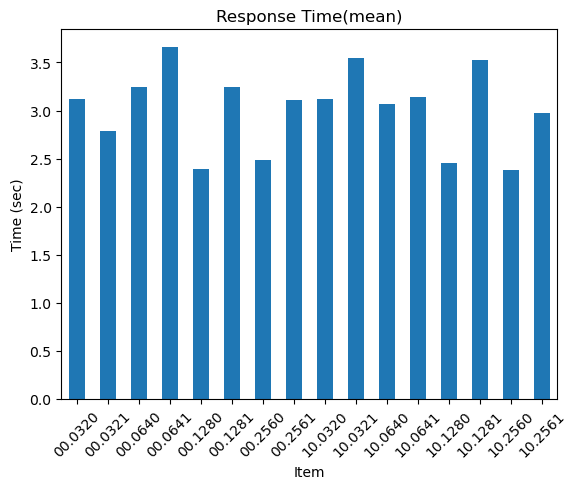

In [14]:
RT_t.get("mean").plot(kind="bar",xlabel="Item",ylabel="Time (sec)",rot=45, title="Response Time(mean)")

### **Participant Performance**
### Response Accuarcy

In [15]:
X.T.astype('category').describe().T

,count,unique,top,freq
0,16,2,1,12
1,16,2,1,10
2,16,2,1,10
3,16,2,1,9
4,16,2,1,9
...,...,...,...,...
22,16,2,1,11
23,16,2,1,10
24,16,2,1,11
25,16,2,1,13


In [16]:
X_percent = pd.DataFrame(X.T.astype('category').describe().T.freq/J)
X_percent
X_percent.loc[12]

freq    0.875
Name: 12, dtype: float64

In [17]:
mean_score = X_percent.sum(axis=1).mean()
mean_score

0.6458333333333334

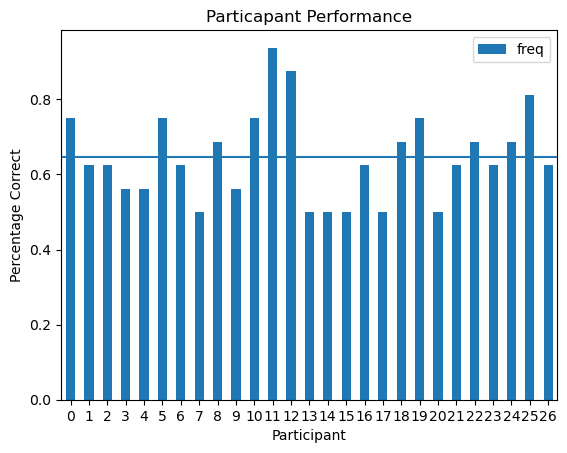

In [18]:
X_percent.plot(kind="bar",xlabel="Participant",ylabel="Percentage Correct",rot=0,title="Particapant Performance").axhline(y=mean_score)

### Response Time

In [19]:
mean_time = RT.sum(axis=1).mean()
mean_time

48.24622891821162

In [62]:
RT.sum(axis=1).loc[6]

91.70306232878195

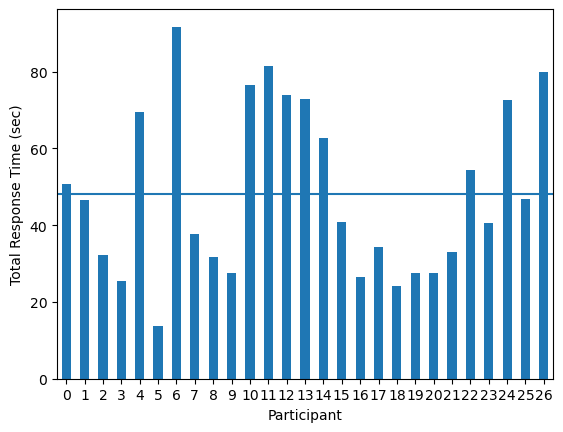

In [21]:
RT.sum(axis=1).plot(kind='bar',rot=0,xlabel="Participant",ylabel="Total Response Time (sec)").axhline(y=mean_time)

## **EZ Diffusion Model**
### **Likelihood**

In [22]:
def _ez_diffusion(a, v, t_er):
    p_jk = v * a
    h_jk = -p_jk

    E_RT_kj = ((1/2) * (a * (1/v))
    ) * (
    (1 - np.exp(h_jk) ) / (1+np.exp(h_jk))
    ) + t_er

    V_RT_kj = (1/2) * (
        a * np.power(1/v,3) * (
            ( 2 * h_jk * np.exp(h_jk) - np.exp(2*h_jk) + 1) / (
                np.power((np.exp(h_jk) + 1),2)
            )
        )
    )
    S_RT_kj = np.sqrt(V_RT_kj)
    
    return E_RT_kj, S_RT_kj, p_jk

In [23]:
def get_model(RT = None , X= None):
        
    I , J = RT.shape if RT is not None else (1,1)

    with pm.Model () as ezdiffusion:
        a = pm.Lognormal("boundary",0,1, shape = (I,1))
        v = pm.Lognormal("drift",0,1, shape = (I,1))
        t_er = pm.Lognormal("non decision",0,1, shape = (I,1))
        E_RT_kj , S_RT_kj , p_kj = _ez_diffusion(a , v , t_er)
        RT = pm.Normal("RT",E_RT_kj , S_RT_kj , shape =(I,J), observed = RT)
        X = pm.Bernoulli("X", pm.invlogit(p_kj), shape = (I,J), observed = X)

    return ezdiffusion

### **Dataset Creation**

In [24]:
items1 = X.astype("category").describe().T.query("top==1").T.columns
items1


Index(['00.0641', '00.1280', '00.1281', '00.2560', '00.2561', '10.0321',
       '10.0640', '10.0641', '10.1280', '10.1281', '10.2560', '10.2561'],
      dtype='object')

In [25]:
items0 = X.astype("category").describe().T.query("top==0").T.columns
items0

Index(['00.0320', '00.0321', '00.0640', '10.0320'], dtype='object')

In [26]:
df_ra1 = X.filter(items=items1)
df_ra1

,00.0641,00.1280,00.1281,00.2560,00.2561,...,10.0641,10.1280,10.1281,10.2560,10.2561
0,1,1,1,1,1,...,1,1,0,1,1
1,1,0,0,0,0,...,1,1,1,1,1
2,0,1,0,1,1,...,0,1,1,1,1
3,0,1,1,1,0,...,0,1,1,1,0
4,0,0,1,1,0,...,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
22,0,1,1,1,1,...,1,1,0,1,1
23,1,1,1,1,1,...,0,1,1,1,1
24,0,1,1,1,0,...,1,1,0,1,0
25,1,1,0,1,1,...,1,1,1,1,1


In [27]:
df_ra0 = X.filter(items=items0)
df_ra0

,00.0320,00.0321,00.0640,10.0320
0,1,0,1,1
1,1,0,0,1
2,0,0,1,0
3,0,1,0,1
4,0,1,1,0
...,...,...,...,...
22,1,1,0,0
23,0,0,0,0
24,1,1,1,1
25,1,1,0,0


In [28]:
X.columns.astype(str)

Index(['00.0320', '00.0321', '00.0640', '00.0641', '00.1280', '00.1281',
       '00.2560', '00.2561', '10.0320', '10.0321', '10.0640', '10.0641',
       '10.1280', '10.1281', '10.2560', '10.2561'],
      dtype='object')

In [29]:
RT.columns

Index(['00.0320', '00.0321', '00.0640', '00.0641', '00.1280', '00.1281',
       '00.2560', '00.2561', '10.0320', '10.0321', '10.0640', '10.0641',
       '10.1280', '10.1281', '10.2560', '10.2561'],
      dtype='object')

In [30]:
df_rt1 = RT.filter(items=items1)
df_rt1

,00.0641,00.1280,00.1281,00.2560,00.2561,...,10.0641,10.1280,10.1281,10.2560,10.2561
0,2.669721,1.641654,3.139845,2.376653,2.340870,...,2.177495,2.535070,4.287059,2.296884,5.216398
1,1.814476,2.620922,1.883987,2.432379,3.061790,...,1.145836,2.644222,1.361222,3.222021,6.187512
2,1.526353,1.802206,2.366354,1.396027,3.173635,...,2.773259,1.112888,1.803943,1.731408,2.889185
3,4.213063,1.146552,1.296862,1.581345,1.349112,...,1.482549,1.284056,1.471857,1.290877,1.110092
4,4.147883,3.385578,5.913593,3.645174,3.036523,...,4.828208,5.975727,3.429209,2.416588,4.615886
...,...,...,...,...,...,...,...,...,...,...,...
22,1.972950,2.973171,2.425388,2.429492,3.211795,...,1.752909,9.593934,3.506077,2.024775,2.050305
23,1.906606,1.461629,2.256095,1.207232,3.521770,...,3.311636,4.395563,3.883667,2.690419,2.231356
24,6.183426,1.690001,4.008438,2.236739,9.494439,...,5.084983,1.763408,10.838684,2.435449,2.503946
25,3.680629,1.975501,2.188318,1.717239,2.089282,...,2.690893,3.100608,3.872693,2.519982,2.357128


In [31]:
df_rt0 = RT.filter(items=items0)
df_rt0

,00.0320,00.0321,00.0640,10.0320
0,4.170772,4.962527,2.647969,3.825262
1,4.421846,3.829552,2.513819,2.608631
2,0.861996,1.159228,2.466041,3.007597
3,0.967065,1.484217,2.835726,1.462183
4,5.397618,2.932957,6.886387,7.281166
...,...,...,...,...
22,2.788482,3.487783,5.337054,4.574943
23,2.362252,3.519212,2.271807,2.431037
24,5.783235,2.107585,3.425153,2.271162
25,2.762112,2.920287,4.346121,2.949143


### **Prior Distribution**

In [32]:
ezdiffusion = get_model()

In [33]:
with ezdiffusion:
    prior_chain = pm.sample_prior_predictive(samples=2000)

prior_chain

Sampling: [RT, X, boundary, drift, non decision]


Inference data with groups:
	> prior

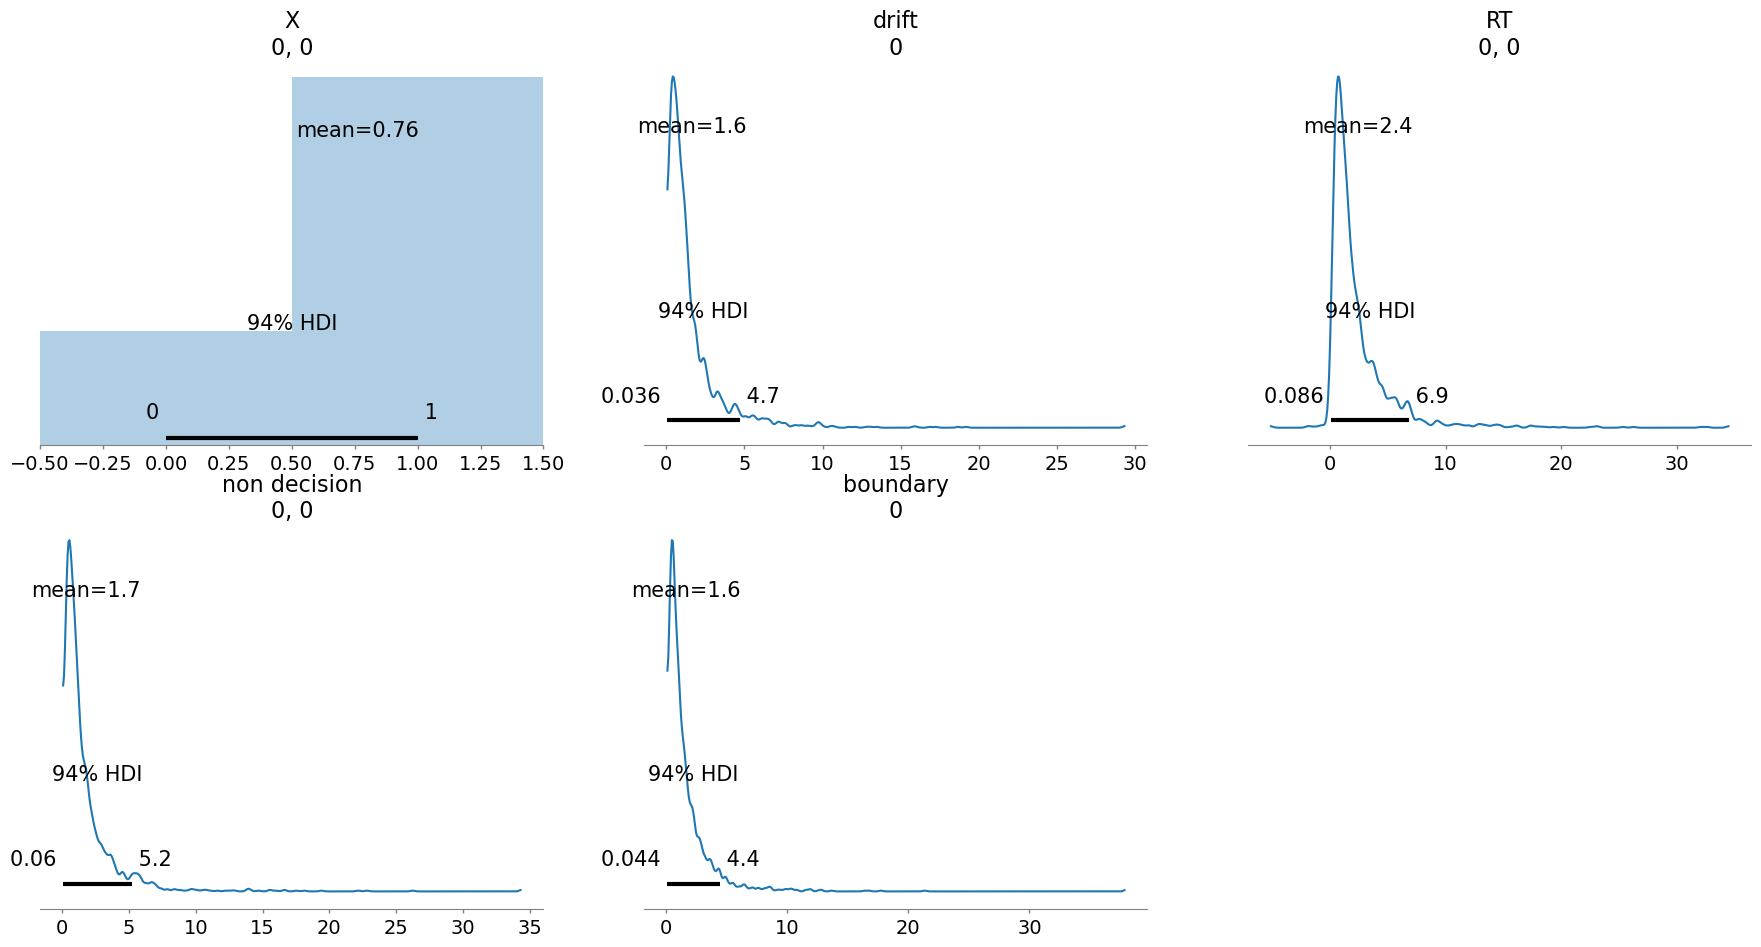

In [34]:
ax = az.plot_posterior(prior_chain, combine_dims={"boundary_dim_0", "drift_dim_0", "non-decision_dim_0"}, group="prior")

### **Prior Predictive Check**
### Hard Dataset

In [35]:
ezdiffusion0 = get_model(df_rt0,df_ra0)

In [36]:
with ezdiffusion0:
    prior_chain0 = pm.sample_prior_predictive(samples=2000)

prior_chain0

Sampling: [RT, X, boundary, drift, non decision]


Inference data with groups:
	> prior
	> prior_predictive
	> observed_data

array([<Axes: xlabel='RT / RT'>, <Axes: xlabel='X / X'>], dtype=object)

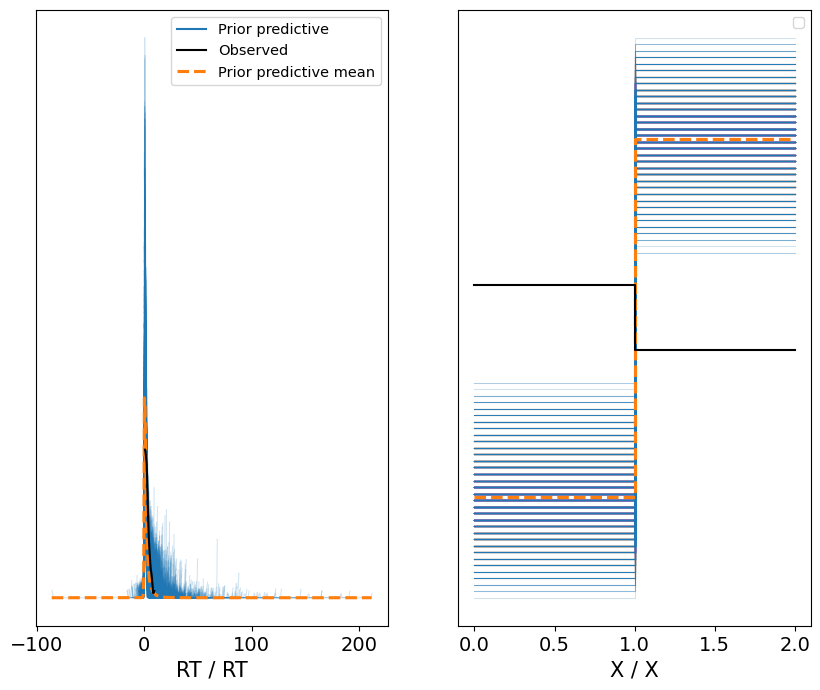

In [37]:
az.plot_ppc(prior_chain0,group="prior",figsize=(10,8))

### Easy Dataset

In [38]:
ezdiffusion1 = get_model(df_rt1,df_ra1)

In [39]:
with ezdiffusion1:
    prior_chain1 = pm.sample_prior_predictive()

prior_chain1

Sampling: [RT, X, boundary, drift, non decision]


Inference data with groups:
	> prior
	> prior_predictive
	> observed_data

array([<Axes: xlabel='RT / RT'>, <Axes: xlabel='X / X'>], dtype=object)

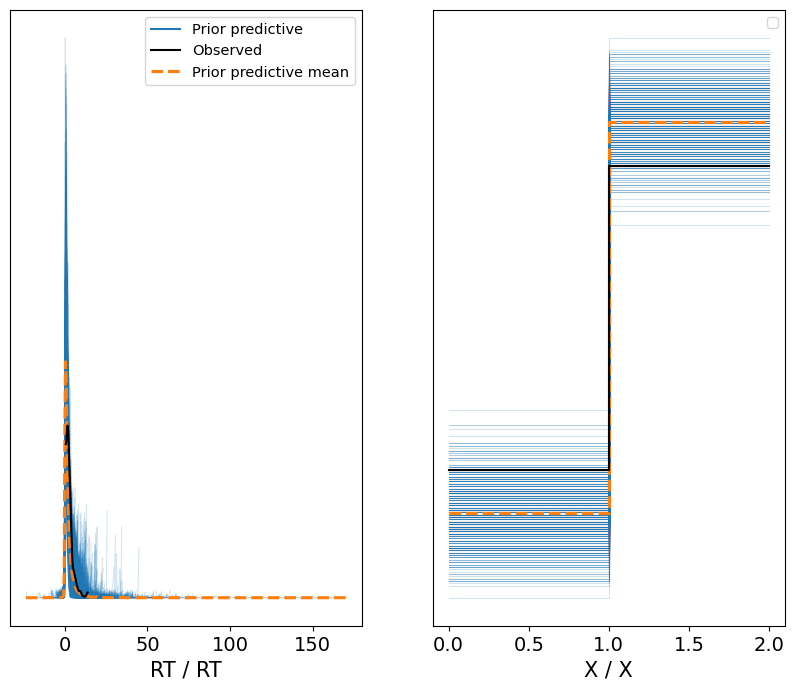

In [40]:
az.plot_ppc(prior_chain1,group="prior",figsize=(10,8))

### **Posterior Distribution Sampling**
### Hard Dataset

In [42]:
with ezdiffusion0:
    posterior_samples0 = pm.sample(tune=4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [boundary, drift, non decision]


Sampling 4 chains for 4_000 tune and 1_000 draw iterations (16_000 + 4_000 draws total) took 92 seconds.


In [43]:
posterior_samples0

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [80]:
converg0 = pd.DataFrame(az.summary(posterior_samples0).r_hat.describe())
converg0

,r_hat
count,81.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


array([<Axes: title={'center': 'boundary\n0'}>,
       <Axes: title={'center': 'drift\n0'}>,
       <Axes: title={'center': 'non decision\n0'}>], dtype=object)

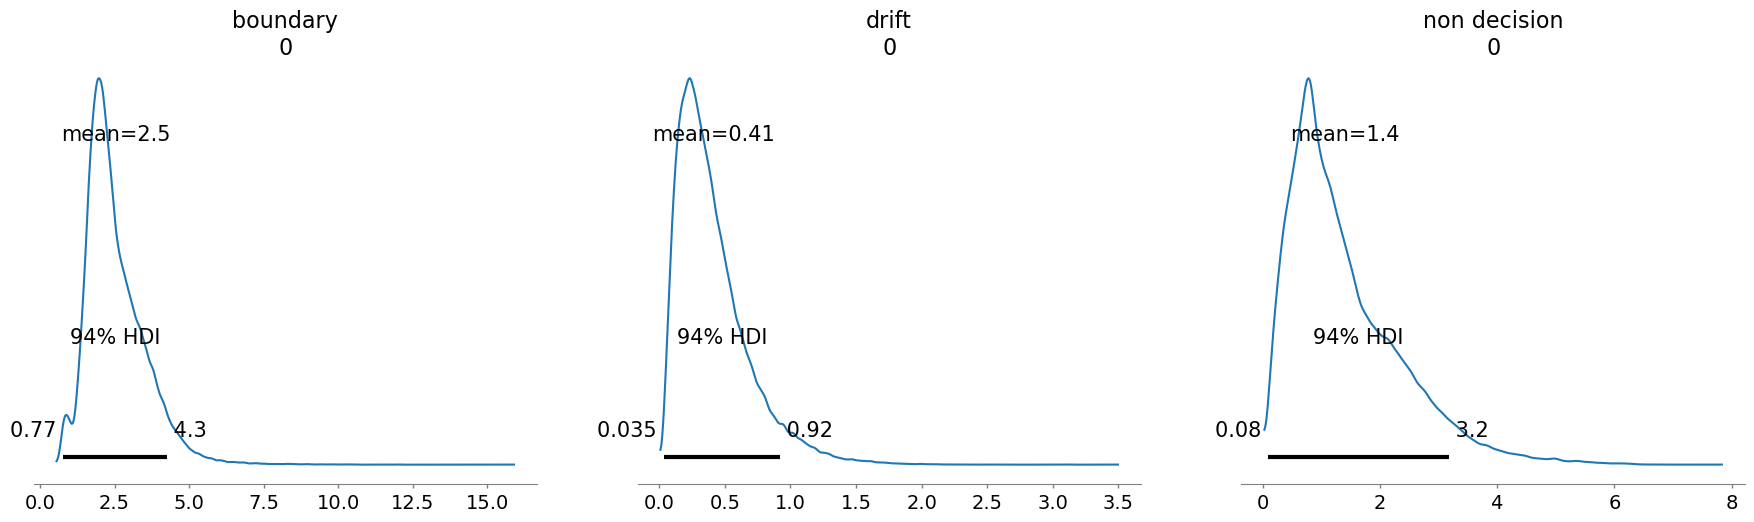

In [45]:
az.plot_posterior(posterior_samples0,combine_dims={"boundary_dim_0","drift_dim_0","non decision_dim_0"},group="posterior")

### Easy Dataset

In [46]:
with ezdiffusion1:
    posterior_samples1 = pm.sample(tune=4000)
                                   
posterior_samples1

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [boundary, drift, non decision]


Sampling 4 chains for 4_000 tune and 1_000 draw iterations (16_000 + 4_000 draws total) took 39 seconds.


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [82]:
converge1 = pd.DataFrame(az.summary(posterior_samples1).r_hat.describe())
converge1

,r_hat
count,81.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


array([<Axes: title={'center': 'boundary\n0'}>,
       <Axes: title={'center': 'drift\n0'}>,
       <Axes: title={'center': 'non decision\n0'}>], dtype=object)

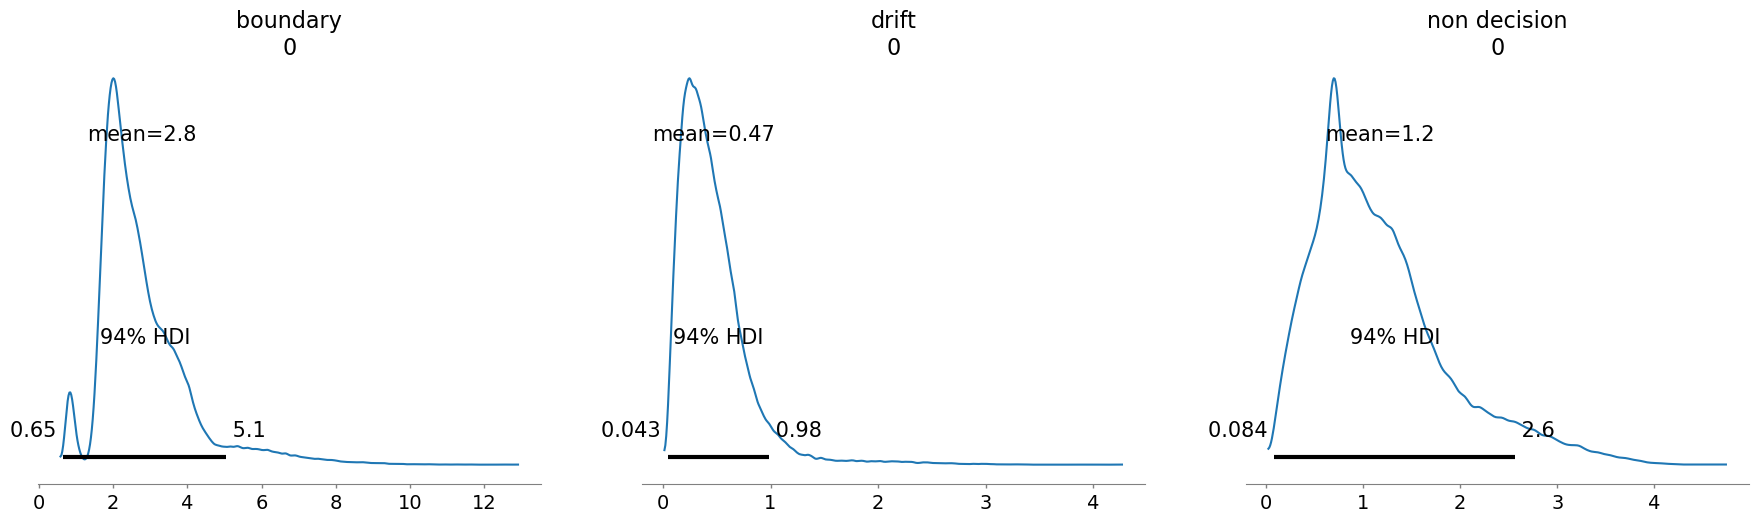

In [47]:
az.plot_posterior(posterior_samples1,combine_dims={"boundary_dim_0","drift_dim_0","non decision_dim_0"},group="posterior")

### **Posterior Predictive Check**
### Hard Dataset

In [48]:
with ezdiffusion0:
    posterior_samples0 = pm.sample_posterior_predictive(trace=posterior_samples0,extend_inferencedata=True)

Sampling: [RT, X]


In [49]:
posterior_samples0

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

array([<Axes: xlabel='RT / RT'>, <Axes: xlabel='X / X'>], dtype=object)

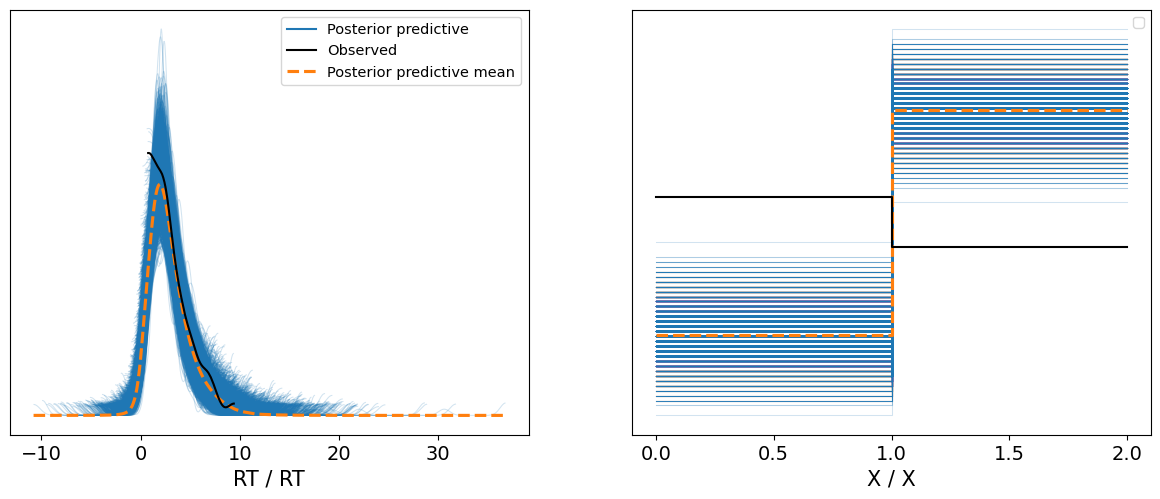

In [50]:
az.plot_ppc(posterior_samples0)

### Easy Data

In [51]:
with ezdiffusion1:
    posterior_samples1 = pm.sample_posterior_predictive(trace=posterior_samples1,extend_inferencedata=True)

Sampling: [RT, X]


array([<Axes: xlabel='RT / RT'>, <Axes: xlabel='X / X'>], dtype=object)

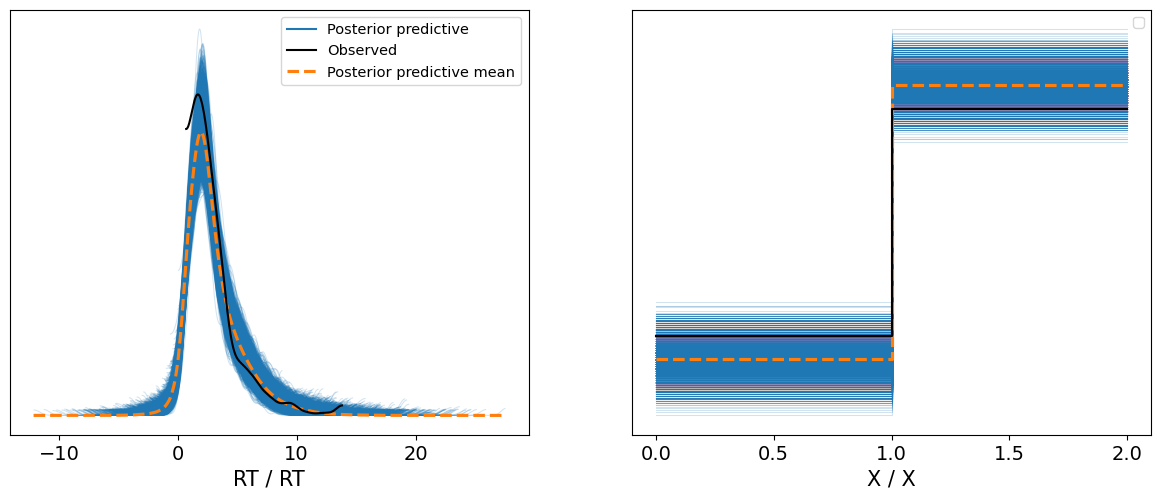

In [52]:
az.plot_ppc(posterior_samples1)

### **Results - Genneral Trend**

In [53]:
az.summary(posterior_samples0)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"boundary[0, 0]",2.733,0.699,1.576,3.955,0.014,0.010,2772.0,2960.0,1.0
"boundary[1, 0]",2.465,0.536,1.603,3.427,0.011,0.008,2922.0,2601.0,1.0
"boundary[2, 0]",2.209,0.336,1.613,2.818,0.005,0.004,4588.0,2592.0,1.0
"boundary[3, 0]",2.049,0.369,1.406,2.717,0.007,0.005,4270.0,2274.0,1.0
"boundary[4, 0]",3.544,0.669,2.340,4.737,0.012,0.009,3356.0,3131.0,1.0
...,...,...,...,...,...,...,...,...,...
"non decision[22, 0]",2.039,0.939,0.267,3.473,0.018,0.013,3014.0,2561.0,1.0
"non decision[23, 0]",1.702,0.519,0.551,2.449,0.015,0.010,1634.0,1122.0,1.0
"non decision[24, 0]",1.025,0.639,0.089,2.198,0.009,0.006,4301.0,2237.0,1.0
"non decision[25, 0]",1.951,0.701,0.536,3.036,0.015,0.010,2703.0,1859.0,1.0


In [54]:
df_summ0 = az.summary(posterior_samples0)
df_summ1 = az.summary(posterior_samples1)


df_plot = pd.DataFrame(dict(easy = df_summ1.loc[:,"mean"], hard=df_summ0.loc[:,"mean"]))
df_plot

,easy,hard
"boundary[0, 0]",2.481,2.733
"boundary[1, 0]",2.769,2.465
"boundary[2, 0]",1.970,2.209
"boundary[3, 0]",2.086,2.049
"boundary[4, 0]",2.594,3.544
...,...,...
"non decision[22, 0]",0.752,2.039
"non decision[23, 0]",1.024,1.702
"non decision[24, 0]",1.057,1.025
"non decision[25, 0]",1.563,1.951


In [55]:
df_plot.index = df_plot.index.str.rsplit("[", expand=True)

In [56]:
df_plot = df_plot.reset_index()

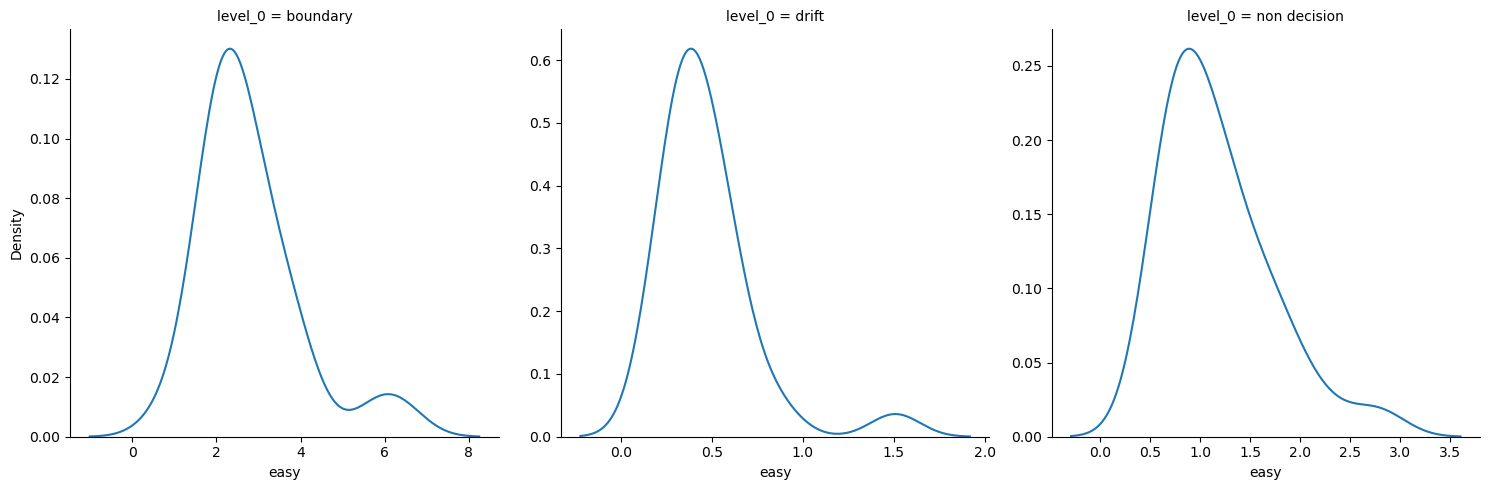

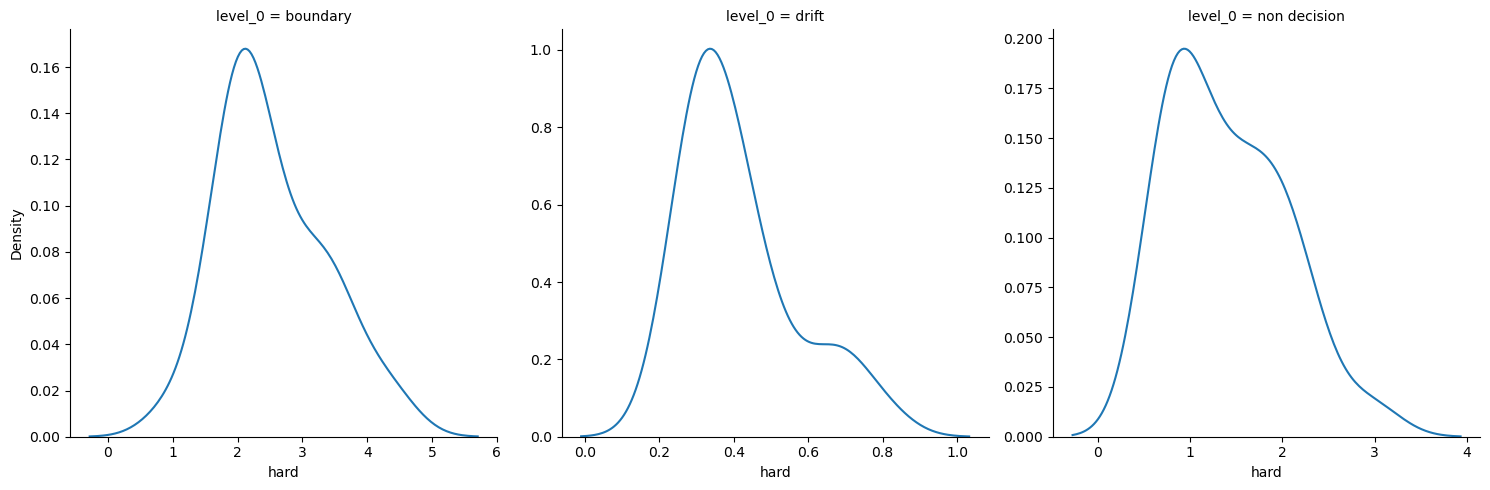

In [57]:
sns.displot(df_plot, x="easy", col="level_0", kind="kde",facet_kws={"sharey":False, "sharex":False})
sns.displot(df_plot, x="hard", col="level_0", kind="kde",facet_kws={"sharey":False, "sharex":False})

### **Results - Per Participant**

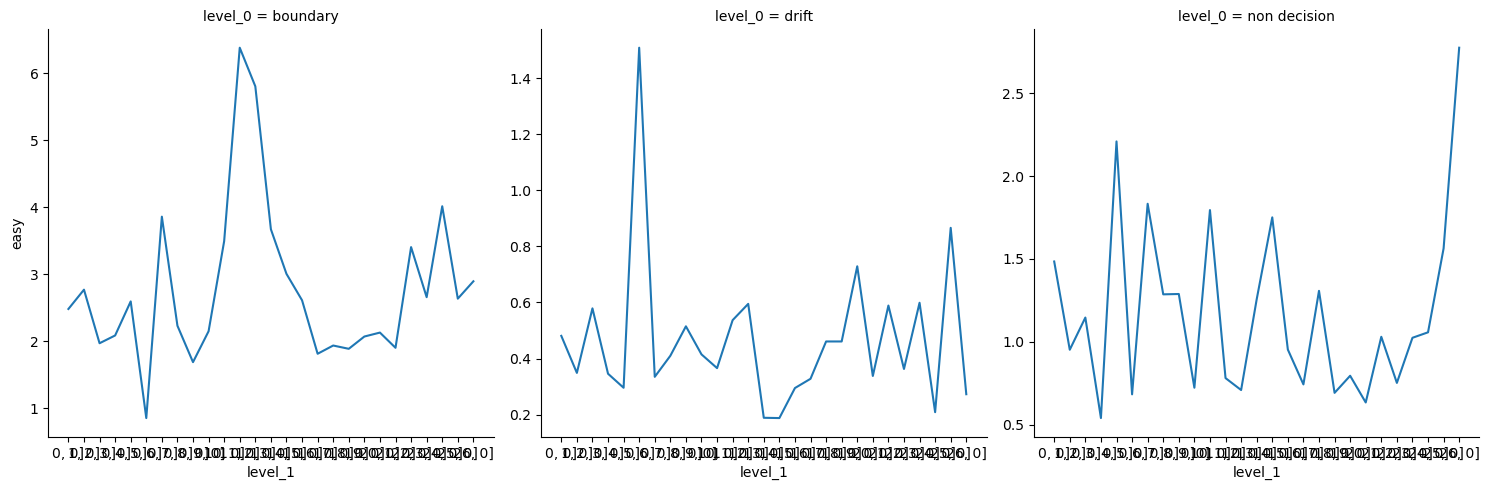

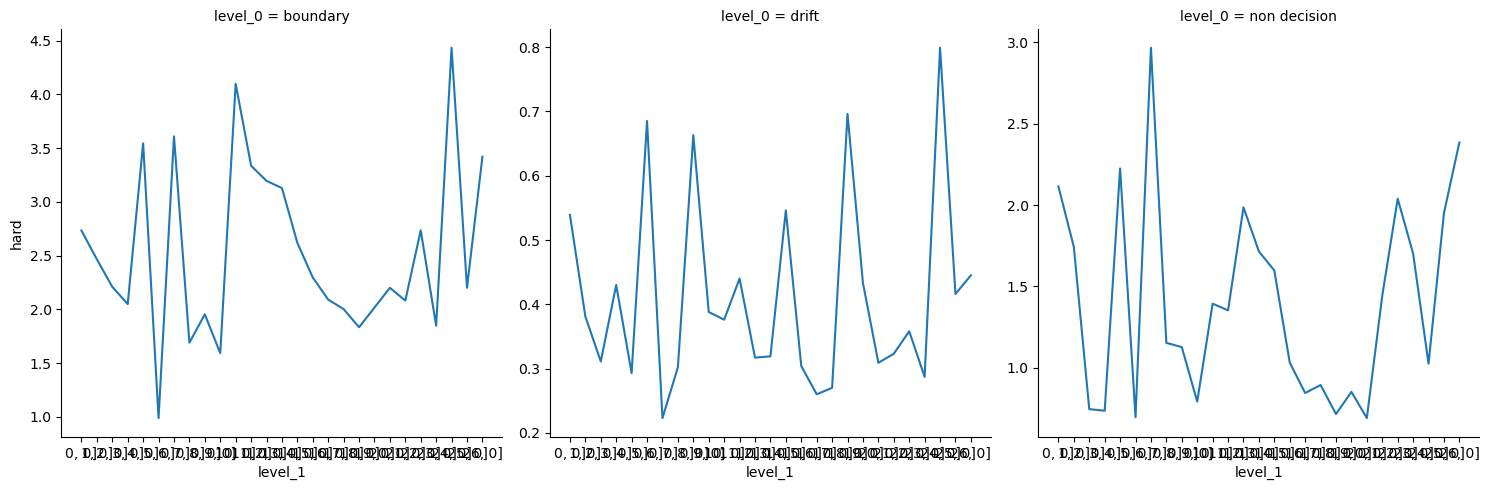

In [58]:

sns.relplot(df_plot, x="level_1", y="easy", col="level_0", kind="line",facet_kws={"sharey":False, "sharex":False})
sns.relplot(df_plot, x="level_1", y="hard", col="level_0", kind="line",facet_kws={"sharey":False, "sharex":False})
